# Pandas 3
### Name -  Rebecah Kwak 
### Class - Vol 3 Lab
### Date - 3rd week

In [8]:
!pip install pydataset

     |████████████████████████████████| 15.9 MB 7.2 MB/s eta 0:00:01
  Created wheel for pydataset: filename=pydataset-0.2.0-py3-none-any.whl size=15939430 sha256=5611ed691630503e7d5d89391d5c01658d368cd6ac57294076571dcbb24c5e37
  Stored in directory: /Users/raul/Library/Caches/pip/wheels/6b/86/a7/f71cb84c7bff804d83e293615a20c0531234397b796aee2645
Successfully built pydataset


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pydataset import data

# Problem 1

In [2]:
def prob1():
    """
    Use groupby objects to determine information about private
    and public universities.
    Specifically examine the columns 'S.F.Ratio', 'Top10perc',
    and 'Top25perc'.
    For each column return the values of the describe function
    for the type of university with the higher mean.
    
    Return:
        ans_1 (ndarray): describe array of universities with 
                         higher S.F.Ratio
        ans_2 (ndarray): describe array of universities with
                         more students from Top10perc
        ans_3 (ndarray): describe array of universities with
                         more students from Top25perc
    """
    #read the data
    data = pd.read_csv("college.csv")
    #grouping the data by privacy
    pandp = data.groupby("Private")
    
    #1. Student to faculty ratio
    des_1 = pandp["S.F.Ratio"].describe()#public is higher
    ans_1 = np.array(des_1.loc[des_1[["mean"]].idxmax()])
    
    #2. Percent of students from the top 10% of their high school class
    des_2 = pandp["Top10perc"].describe()#private is higher
    ans_2 = np.array(des_2.loc[des_2[["mean"]].idxmax()])
    
    #2. Percent of students from the top 25% of their high school class
    des_3 = pandp["Top25perc"].describe()#private is higher
    ans_3 = np.array(des_3.loc[des_3[["mean"]].idxmax()])
    
    return ( ans_1, ans_2, ans_3)

In [3]:
prob1()

(array([[212.        ,  17.13915094,   3.41804873,   6.7       ,
          15.1       ,  17.25      ,  19.325     ,  28.8       ]]),
 array([[565.        ,  29.33097345,  17.85139147,   1.        ,
          17.        ,  25.        ,  36.        ,  96.        ]]),
 array([[565.        ,  56.95752212,  19.58836048,   9.        ,
          42.        ,  55.        ,  70.        , 100.        ]]))

# Problem 2

In [4]:
def prob2():
    """
    Use groupby visualizations to compare the following
    in private and public universities:
        1. Number of applicants, accept applicants, and
           enrolled applicants
        2. Range of price for room and board
    """
    #read the data
    data = pd.read_csv("college.csv")
    #grouping the data by privacy
    pandp = data.groupby("Private")
    
    #Q1. How do the number of applicants, number of accepted students,
    #and number of enrolled students compare between 
    #private and public universities?
    pandp[["Apps", "Accept", "Enroll"]].std().plot(kind="barh", title=r"Number of applicatns, accepted students, enrolled students")
    plt.xlabel("Number of students")
    plt.ylabel("Differences of Private and Public schools")
    
    #Q2. How does the range of money spent on room and 
    #board compare between private and paublic universities?
    data.boxplot(["Room.Board"], by = "Private", grid = False)
    plt.ylabel("The range of money spent on room and board")
    plt.tight_layout()

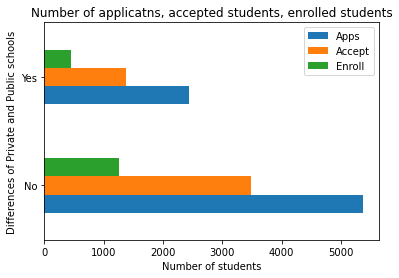

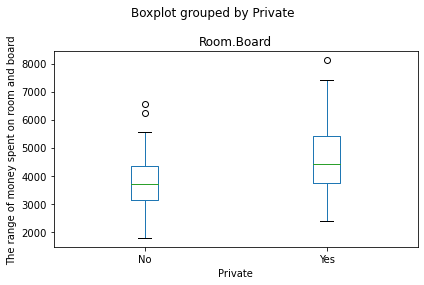

In [5]:
prob2()

# Problem 3

In [85]:
def prob3():
    """
    Use Ohio_1999.csv and pivot tables to answer the
    following questions
        1. Which race/sex combination makes the most money in total?
        2. Which race/sex combination worked the least amount of 
            cumulative hours?
        3. What race/sex combination worked the most hours per week per person?
    
    Returns:
        ans_1 (tuple): tuple with race and sex code, respectively
        ans_2 (tuple): tuple with race and sex code, respectively
        ans_3 (tuple): tuple with race and sex code, respectively
    """
    ohio = pd.read_csv("Ohio_1999.csv")
    que1 = ohio.pivot_table(values="Usual Weekly Earnings", index = "Sex", columns = "Race", aggfunc = "sum")
    print(que1)
    
    que2 = ohio.pivot_table(values="Usual Hours Worked", index = "Sex", columns = "Race", aggfunc = "sum")
    print(que2)
    
    que3 = ohio.pivot_table(values = "Usual Hours Worked", index = "Sex", columns = "Race", aggfunc = "mean")
    print(que3)
    
    return (1,1), (3,2), (3,1)

In [86]:
prob3()

Race       1      2  3     4
Sex                         
1     145789  10768  0  5103
2      85867   6004  0  2553
Race      1     2    3    4
Sex                        
1     36939  2382  146  580
2     23335  2584   40  365
Race          1          2          3          4
Sex                                             
1     43.254098  40.372881  48.666667  38.666667
2     40.512153  38.000000  40.000000  40.555556


((1, 1), (3, 2), (3, 1))

# Problem 4

In [180]:
def prob4():
    """
    Use Ohio_1999.csv to answer the following questions:
        1. What is the most common degree among workers?
        2. Which age group works the most hours on average?
        3. What age/degree combination has the smallest yearly
           salary on average?
    
    Return:
        ans_1 (Interval): degree interval
        ans_2 (Interval): age interval
        ans_3 (Interval, Interval): age interval and degree interval
    """
    #read the file
    ohio = pd.read_csv("Ohio_1999.csv")
    #cutting into categories
    ohio['ainned'] = pd.cut(ohio['Educational Attainment'],[0,38, 42,46])
    #getting the first answer
    ans_1 = pd.value_counts(ohio['ainned']).idxmax()
    print(ohio['ainned'])

    
    #cutting the age into euqal 6 categories
    fare = pd.qcut(ohio['Age'], 6)
    #getting the pivot table
    piv2 = ohio.pivot_table(values="Usual Hours Worked", index=[fare], columns = [fare], aggfunc="mean")
    ans_2 = pd.Interval(40.0,46.0, closed = 'right')
    
    #cutting the data into degrees and ages
    piv3 = ohio.pivot_table(values="Yearly Salary", index= ['ainned'], columns = [fare])
    #getting the answer for third question
    ans_3 = (pd.Interval(15.999,29.0, closed = 'right'),pd.Interval(0,38, closed = 'right'))
    return (ans_1, ans_2, ans_3)

In [181]:
prob4()

0       (38, 42]
1       (38, 42]
2        (0, 38]
3       (42, 46]
4       (38, 42]
          ...   
1580    (38, 42]
1581    (38, 42]
1582    (38, 42]
1583    (38, 42]
1584    (38, 42]
Name: ainned, Length: 1585, dtype: category
Categories (3, interval[int64, right]): [(0, 38] < (38, 42] < (42, 46]]


(Interval(38, 42, closed='right'),
 Interval(40.0, 46.0, closed='right'),
 (Interval(15.999, 29.0, closed='right'), Interval(0, 38, closed='right')))

# Problem 5

In [182]:
def prob5():
    """
    Use pivot tables and groupby objects on the data in
    College.csv to answer the following questions:
        1. Is there a correlation between the percent of alumni
           that donate and the amount the school spends per
           student in both private and public universities?
        2. Is the graduation rate partition with the greatest
           number of schools the same for private and public
           universities?
        3. Is there an inverse correlation between acceptance
           rate and having students from the top 10% of their
           high school class?
        4. Why is the average percentage of students admitted
           from the top 10 percent of their high school class
           so high in private universities with very low
           acceptance rates? Use only the data to explain why; 
           do not extrapolate.
    
    Returns:
        ans_1 (bool): answer to question 1
        ans_2 (bool): answer to question 2
        ans_3 (bool): answer to question 3
        ans_4 (str): answer to question 4
    """
    #read the data
    college = pd.read_csv("college.csv")
    
    #Q.1
    #compare by the graphs
    college.plot(kind = 'scatter', x = 'perc.alumni', y = 'Expend', alpha = .8)
    plt.show()
    ans_1 = False
    
    #Q.2
    #partition Grad.Rate into evenly spaced intervals of 20%
    rate = pd.cut(college['Grad.Rate'],[0,19,39,59,79,100])
    #get the pivot table to compare
    comp = college.pivot_table(values = "Grad.Rate", index = ["Private"], columns = [rate], aggfunc = "mean")
    #find the greatest partition for both
    comp2 = comp.idxmax(axis = 1)
    print(comp)
    ans_2 = False
    
    #Q.3
    #compare by the graphs
    college.plot(kind = 'scatter', x = 'Accept', y = 'Top10perc', alpha = .8)
    plt.show()
    ans_3 = False
    
    return (ans_1, ans_2, ans_3)

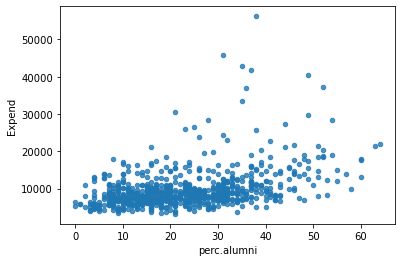

Grad.Rate  (0, 19]   (19, 39]   (39, 59]   (59, 79]  (79, 100]
Private                                                       
No            10.0  33.833333  50.614679  67.753846  87.538462
Yes           16.0  32.000000  52.085271  69.446215  88.535032


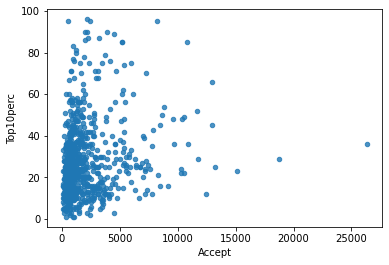

(False, False, False)

In [183]:
prob5()

In [11]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.preprocessing import OrdinalEncoder

5.1
Use the RandomForestClassifier from sklearn.ensemble to build a forest with 100 trees that classifies (predicts death of passengers) in the Titanic dataset.

(i) Use the oob_score to estimate the accuracy of the predictions.

In [19]:
data = pd.read_csv('titanic.csv', index_col = 'PassengerId')
X = data[data.columns].drop(labels=['Name', 'Ticket', 'Cabin'], axis = 1)

mask = X['Sex']=='male'
X['Sex'] = mask
X.dropna(inplace=True)
Cmask = X['Embarked']=='C'
Smask = X['Embarked']=='S'
X['Embarked'] = Cmask*2 + Smask

y = X['Survived']
X.drop('Survived', axis=1, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .3)

rfc = RFC(bootstrap = True, oob_score = True)
rfc.fit(X,y)

oob_score = rfc.oob_score_

print("Predictions: "+ str(100*oob_score))

Predictions: 80.0561797752809


(ii) Use oob_score with various combinations of hyperparameters in the RandomForestClassifier applied to the Titanic dataset in order to find the optimal values of max_depth and max_features. Hint: Be sure to set warm_start=False—if you forget, each of your experiments could build on the previous forest instead of starting over.

In [35]:
max_depths = [1, 2, 3, 4, 5, 6]
max_feature = [1, 2, 3, 4, 5, 6]

oob_ting, combos = 0, ()

for md in max_depths:
    for mf in max_feature:
        rfc = RFC(max_depth = md, max_features = mf, bootstrap = True, oob_score = True) #get the rfc w/ the combo
        rfc.fit(x,y)
        
        if rfc.oob_score_ > oob_ting:
            oob_ting = rfc.oob_score_
            combos = (md, mf)

print("oob_score: ", oob_ting)
print("max_depth: ", combos[0])
print("max_features: ", combos[1])

oob_score:  0.8230337078651685
max_depth:  4
max_features:  5


(iii) Using the combination of hyperparameters that gave the best value of oob_score, identify the three most-important features and the three least-important features using feature_importances_. How do the re- sults compare with your intution about which features are most and least important?


In [38]:
rfc = RFC(max_depth = 6, max_features = 2, bootstrap = True, oob_score = True)
rfc.fit(X,y)
print("Three most important features:", X.columns[np.argsort(rfc.feature_importances_)[::-1][:3]])
print("Three least important features:", X.columns[np.argsort(rfc.feature_importances_)[:3]])
print("I though the Sex was an important feature to consider and it was the same for the result that I got.")

Three most important features: Index(['Sex', 'Fare', 'Age'], dtype='object')
Three least important features: Index(['Embarked', 'Parch', 'SibSp'], dtype='object')
I though the Sex was an important feature to consider and it was the same for the result that I got.


5.12. Use the RandomForestClassifier from sklearn.ensemble to build a forest with at least 200 trees that classifies digits in the MNIST dataset. Experiment with hyperparameters to get the best oob_score you can.

In [71]:
X,y = datasets.load_digits(return_X_y = True)

#use RFC to build forest w/ at least 200 trees to classify digits in dataset:
rfc = RFC(n_estimators = 200, bootstrap = True, oob_score = True)
rfc.fit(X,y)

max_depths = [1, 2, 3, 4, 5, 6]
max_feature = [1, 2, 3, 4, 5, 6]

oob_ting, combos = 0, ()

for md in max_depths:
    for mf in max_feature:
        rfc = RFC(max_depth = md, max_features = mf, bootstrap = True, oob_score = True) #get the rfc w/ the combo
        rfc.fit(X,y)
        
        if rfc.oob_score_ > oob_ting:
            oob_ting = rfc.oob_score_
            combos = (md, mf)

print("oob_score: ",oob_ting)
print("max_depth: ",combos[0])
print("max_features: ", combos[1])

rfc = RFC(max_depth = 6, max_features = 6, bootstrap = True, oob_score = True)
rfc.fit(X,y)
print("Three most imporatnt digits:", np.argsort(rfc.feature_importances_)[::-1][:3])
print("Three least important digits:", np.argsort(rfc.feature_importances_)[:3])

oob_score:  0.9504730105731776
max_depth:  6
max_features:  4
Three most imporatnt digits: [21 36 26]
Three least important digits: [ 0 56 48]


5.13. Use the RandomForestRegressor from sklearn.tree to build a forest that predicts housing values in the California housing dataset.

(i) Use oob_score to select the best combination of the hyperparameters max_depth and max_features. Hint: remember to set warm_start= False.

In [72]:
data = datasets.fetch_california_housing()
X,y = data['data'], data['target']
rfr = RFR(oob_score = True)
rfr.fit(X,y)

RandomForestRegressor(oob_score=True)

(i) Use oob_score to select the best combination of the hyperparameters max_depth and max_features. Hint: remember to set warm_start= False.

In [74]:
max_depths = [1, 2, 3, 4, 5, 6]
max_feature = [1, 2, 3, 4, 5, 6,7,8]

oob_ting, combos = 0, ()

for md in max_depths:
    for mf in max_feature:
        rfr = RFR(max_depth = md, max_features = mf, bootstrap = True, oob_score = True) #get the rfc w/ the combo
        rfr.fit(X,y)
        
        if rfr.oob_score_ > oob_ting:
            oob_ting = rfr.oob_score_
            combos = (md, mf)

print("oob_score: ",oob_ting)
print("max_depth: ",combos[0])
print("max_features: ", combos[1])

oob_score:  0.7113574773740483
max_depth:  6
max_features:  4


(ii) Using the optimal combination of hyperparameters chosen in the previ- ous step, find the three most-important and three least-important fea- tures.

In [76]:
rfr = RFR(max_depth = 6, max_features = 5, oob_score = True)
rfr.fit(X,y)

print("Three most important features:", np.array(data.feature_names)[np.argsort(rfr.feature_importances_)[::-1][:3]])
print("Three least important features:", np.array(data.feature_names)[np.argsort(rfr.feature_importances_)[:3]])

Three most important features: ['MedInc' 'AveOccup' 'AveRooms']
Three least important features: ['Population' 'AveBedrms' 'HouseAge']


5.14. Apply a random forest regressor or classifier to your final project dataset.


(i) Optimizethechoiceofhyperparameters,includingn_estimators,max_depth
and max_features.

In [ ]:
data = pd.read_csv('Nigerian_Car_Prices.csv', index_col=0)

for col in ['Mileage', 'Engine Size', 'Year of manufacture']:
    data[col] = data[col].fillna(int(np.mean(data[col].dropna()))) 
data = data.fillna('')

def bin_size(size):
    if size < 2000:
        return '<2000'
    if size < 3000:
        return '2000-3000'
    if size < 4000:
        return '3000-4000'
    if size < 5000:
        return '4000-5000'
    else:
        return '>5000'
    
data['Engine Size'] = data['Engine Size'].apply(bin_size) 

def bin_mileage(mileage):
    if mileage < 50000:
        return '<50k'
    if mileage < 100000:
        return '50-100k'
    if mileage < 150000:
        return '100-150k'
    if mileage < 200000:
        return '150-200k'
    else:
        return '>200k'
    
data['Mileage'] =data['Mileage'].apply(bin_mileage)

X = data.drop(['Price'], axis=1)
columns = X.columns
y = data['Price'].apply(lambda x: x.replace(',', '')).astype(float)

enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
enc.fit(X)

X = enc.transform(X)

oob_ting, combos = 0,()

n_estimators = [100,150,200,250,300]
max_depth = [1,2,3,4,5,6,7]
max_features = [1,2,3,4,5,6,7,8]

for n in n_estimators:
    for md in max_depth:
        for mf in max_features:
            rfr = RFR(n_estimators = n, max_depth = md, max_features = mf, oob_score = True)
            rfr.fit(X,y)
            
            if rfr.oob_score_ >= oob_ting:
                combos = (n,md,mf)
                oob_ting = rfr.oob_score_

print(combos)

[[46. 14.  3. ...  4.  2.  0.]
 [26. 14.  0. ...  0.  2.  0.]
 [30. 15.  3. ...  4.  2.  0.]
 ...
 [16. 13.  3. ...  4.  2.  0.]
 [46. 14.  3. ...  4.  2.  0.]
 [46. 20.  2. ...  4.  2.  0.]] 0       3120000.0
1       5834000.0
2       3640000.0
3       3594000.0
4       8410000.0
          ...    
4090    1125000.0
4091    2643750.0
4092    1462500.0
4093    2475000.0
4094    6300000.0
Name: Price, Length: 4095, dtype: float64


(ii) Compare the performance of the random forest to the performance of
other types of models on this dataset.

In [84]:
rfr = RFR(n_estimators = combos[0], max_depth = combos[1], max_features = combos[2], oob_score = True)
rfr.fit(X,y)

RandomForestRegressor(max_depth=7, max_features=6, n_estimators=250,
                      oob_score=True)

(iii) Ifappropriateforthisdataset,identifythethreemost-andleast-important features. If this is not appropriate to do for this dataset, explain why it is not.

In [86]:
labels = data.columns[:7].append(data.columns[8:])

print('Three most important features:', labels[np.argsort(rfr.feature_importances_)[::-1][:3]])
print("Three least important features:", labels[np.argsort(rfr.feature_importances_)[:3]])
print("This is not a continuous dataset")

Three most important features: Index(['Year of manufacture', 'Build', 'Condition'], dtype='object')
Three least important features: Index(['Transmission', 'Fuel', 'Engine Size'], dtype='object')
This is not a continuous dataset


In [ ]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

data = pd.read_csv('Nigerian_Car_Prices.csv', index_col=0)

for col in ['Mileage', 'Engine Size', 'Year of manufacture']:
    data[col] = data[col].fillna(int(np.mean(data[col].dropna()))) 
data = data.fillna('')

def bin_size(size):
    if size < 2000:
        return '<2000'
    if size < 3000:
        return '2000-3000'
    if size < 4000:
        return '3000-4000'
    if size < 5000:
        return '4000-5000'
    else:
        return '>5000'
    
data['Engine Size'] = data['Engine Size'].apply(bin_size) 

def bin_mileage(mileage):
    if mileage < 50000:
        return '<50k'
    if mileage < 100000:
        return '50-100k'
    if mileage < 150000:
        return '100-150k'
    if mileage < 200000:
        return '150-200k'
    else:
        return '>200k'
    
data['Mileage'] =data['Mileage'].apply(bin_mileage)

X = data.drop(['Price'], axis=1)
columns = X.columns
y = data['Price'].apply(lambda x: x.replace(',', '')).astype(float)


enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
enc.fit(X)

X = enc.transform(X)

print(X,y)

X_train, X_test = X[:10], X[10:]
y_train, y_test = y[:10], y[10:]

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)

In [6]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

X, y = make_hastie_10_2(random_state=0)
X_train, X_test = X[:2000], X[2000:]
y_train, y_test = y[:2000], y[2000:]

print(X_train, X_test)
print(y_train, y_test)

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)

[[ 1.76405235  0.40015721  0.97873798 ... -0.15135721 -0.10321885
   0.4105985 ]
 [ 0.14404357  1.45427351  0.76103773 ... -0.20515826  0.3130677
  -0.85409574]
 [-2.55298982  0.6536186   0.8644362  ... -0.18718385  1.53277921
   1.46935877]
 ...
 [ 1.90281343 -0.24274512 -0.91174314 ... -0.7888105   0.20570363
   0.34291633]
 [-0.75590132  0.9190708   1.53418368 ... -0.87764821 -0.98026165
   2.3940371 ]
 [ 1.6527679   2.01816098  0.06696846 ... -0.05725925 -1.05893126
  -0.32652844]] [[ 3.30045889e-01 -4.79979434e-04  8.18115898e-01 ...  6.02120978e-01
  -8.65190000e-01 -1.53320351e-01]
 [-2.40490559e-01 -6.07633463e-02  5.32866124e-01 ...  9.30255080e-01
   4.05182611e-01  2.04002481e-01]
 [-8.22765590e-01 -1.27687431e+00 -2.26436874e-01 ...  7.79633652e-01
   4.54984017e-01 -1.30343574e+00]
 ...
 [ 1.99864648e-01  2.61345779e-01 -1.27986805e-01 ... -5.17182892e-01
   7.96941407e-02  1.01612661e+00]
 [-1.51673157e-01 -1.42519962e+00  1.07092211e+00 ... -1.20676602e+00
  -1.04746487e

0.913

In [8]:
import numpy as np

def advec_diffuse(a,dt,T,x=[],u0=[]):
    """Uses a spectral decomposition and forward Euler to solve
    the 1D advection diffusion equation u_t + au_x = u_xx.
    Assumes the domain is [0,2pi] or else the wavenumbers would  -
    need to be weighted differently.
    a is the advection speed
    dt is the time-step
    T is the final time we run to
    x is the spatial discretization
    u0 is the initial condition

    Because this uses the fft, it is best to have len(x) = 2^K  -
    r some integer K"""

    N = len(x)
    #The most difficult part is figuring out how numpy indexes the wavenumbers
    k = np.array([1j*y for y in range(0,int(N/2))] + [0] + [1j*y for y in range(int(-N/2)+1,0)])
    k2 = -k**2;
    u = [] 
    u.append(u0)
    uhat = np.fft.fft(u0)
    totalStep = int(T/dt)
    for nn in range(totalStep):
        # forward Euler time-stepping
        new_uhat = (1+dt*(-a*k-k2)/2)*uhat/(1-dt*(-a*k-k2)/2)
        uhat = new_uhat.copy()
        # revert back to real values (not necessary unless we want
        # to save our solution in real space)
        u.append(np.real(np.fft.ifft(uhat)))
    return x,u

In [38]:
import numpy as np

def advec_diffuse(a,dt,T,x=[],u0=[]):
    """Uses a spectral decomposition and forward Euler to solve
    the 1D advection diffusion equation u_t + au_x = u_xx.
    Assumes the domain is [0,2pi] or else the wavenumbers would  -
    need to be weighted differently.
    a is the advection speed
    dt is the time-step
    T is the final time we run to
    x is the spatial discretization
    u0 is the initial condition

    Because this uses the fft, it is best to have len(x) = 2^K  -
    r some integer K"""

    N = len(x)
    #The most difficult part is figuring out how numpy indexes the wavenumbers
    k = np.array([1j*y for y in range(0,int(N/2))] + [0] + [1j*y for y in range(int(-N/2)+1,0)])
    k2 = -k**2;
    u = [] 
    u.append(u0)
    uhat = np.fft.fft(u0)
    totalStep = int(T/dt)
    for nn in range(totalStep):
        # forward Euler time-stepping
        new_uhat = (uhat+(dt)*(-a*k-k2)*uhat/2)/(1-(dt)*(-a*k-k2)/2)
        uhat = new_uhat.copy()
        # revert back to real values (not necessary unless we want
        # to save our solution in real space)
        u.append(np.real(np.fft.ifft(uhat)))
    return x,u

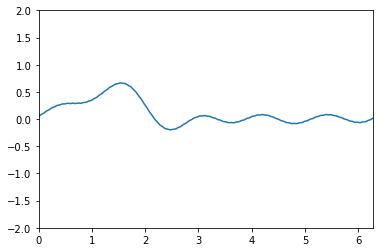

In [39]:
from matplotlib.animation import FuncAnimation

x = np.linspace(0,2*np.pi,128)
u0 = lambda x: np.sin(x**2)+np.cos(5*x)
x,u = advec_diffuse(4,0.001, 50, x=x, u0=u0(x))
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim((0,2*np.pi))
ax.set_ylim((-2,2))
sol, = plt.plot([],[])
def update(i):
    sol.set_data(x,u[i])
    return sol
ani = FuncAnimation(fig, update, frames = range(100), interval = 20)
ani.save("cool5.mp4")
plt.show()

<video src= "cool5.mp4" controls>

In [46]:
import numpy as np

def diffusive_burgers(dt,T,x=[],u0=[]):
    """Uses a spectral decomposition and forward Euler to solve
    the 1D diffusive Burgers equation u_t + uu_x = u_xx.
    Assumes the domain is [0,2pi] or else the wavenumbers would 
    need to be weighted differently.
    dt is the time-step
    T is the final time we run to
    x is the spatial discretization
    u0 is the initial condition
    Because this uses the fft, it is best to have len(x) = 2^K  -
    for some integer K"""
    
    N = len(x)
    #The most difficult part is figuring out how numpy indexes the wavenumbers
    k = np.array([1j*y for y in range(0,int(N/2))] + [0] + [1j*y for y in range(int(-N/2)+1,0)])
    k2 = -k**2;
    k4 = -k**4
    u = [] 
    u.append(u0)
    uhat = np.fft.fft(u0)
    totalStep = int(T/dt)
    for nn in range(totalStep):
        # forward Euler time-stepping
        new_uhat = uhat + dt*(np.fft.fft(np.fft.ifft(k*uhat)*np.fft.ifft(uhat)) + k2 * uhat+k4*uhat)
        uhat = new_uhat.copy()
        # revert back to real values (not necessary unless we want
        # to save our solution in real space)
        u.append(np.real(np.fft.ifft(uhat)))
    return x,u

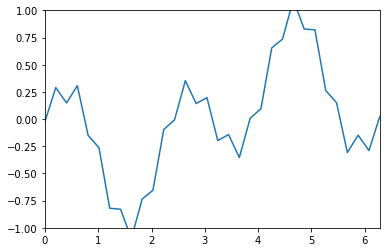

In [50]:
x=np.linspace(0,2*np.pi,32)
u0 = np.sin(x)*np.cos(x*2)+0.5*np.sin(14*x)
x,u = diffusive_burgers(.000001,10,x=x,u0=u0)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim((0,2*np.pi))
ax.set_ylim((-1,1))
#ax.set_ylim((-100000,100000))
sol, = plt.plot([],[])
def update(i):
    sol.set_data(x,u[i])
    return sol
ani = FuncAnimation(fig, update, frames=range(100), interval=20)
ani.save("temp.mp4")
plt.show()

<video src="temp.mp4" controls>